<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/Project4_Vehicle_1_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Imports

In [124]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


Reading Raw Data from given Dataset

In [125]:
rawdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vehicle-1.csv')

# Exploratory Data Analysis & Data Preprocessing

In [126]:
rawdata.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [127]:
rawdata.size

16074

In [128]:
rawdata.shape

(846, 19)

Given data set has 846 rows and 19 columns

In [129]:
rawdata.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


Check for null values

In [130]:
rawdata.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are null values available in the mentioned columns. This needs to be cleaned before feeding the data to the model.

In [131]:
rawdata.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

All columns are numerical data except 'class'

In [132]:
rawdata.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [133]:
rawdata['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

The given data can be classified either Car,  Van, Bus. As per the business domain the data points can be classified into these 3 clusters. Hence keeping the number of clusters as **K = 3**

In [134]:
rawdata['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Count of Cars >= Count of Buses an Vans

## Handling Imputation / Data cleaning

Since the classification labels occurs in 'class' column. For better understanding for the machine to read, converting the class labels to machine readable integers.

In [135]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
rawdata['class'] = lEncoder.fit_transform(rawdata['class'])

Missing values handled in two ways
1. Deleting the particular row in the dataset.
2. Filling this up by mean/median/mode. Mean should be used for continuous data.


This Imputation can be done in two ways
1. Using standard numpy methods by updating the existing dataset
2. Using sklearn.impute package - SimpleImputer class.

In [136]:
from sklearn.impute import SimpleImputer

sImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(sImputer.fit_transform(rawdata), columns= rawdata.columns)

In [137]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,2.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,2.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,2.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,0.0


In [138]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

With this we have removed all the missing values in the dataset.

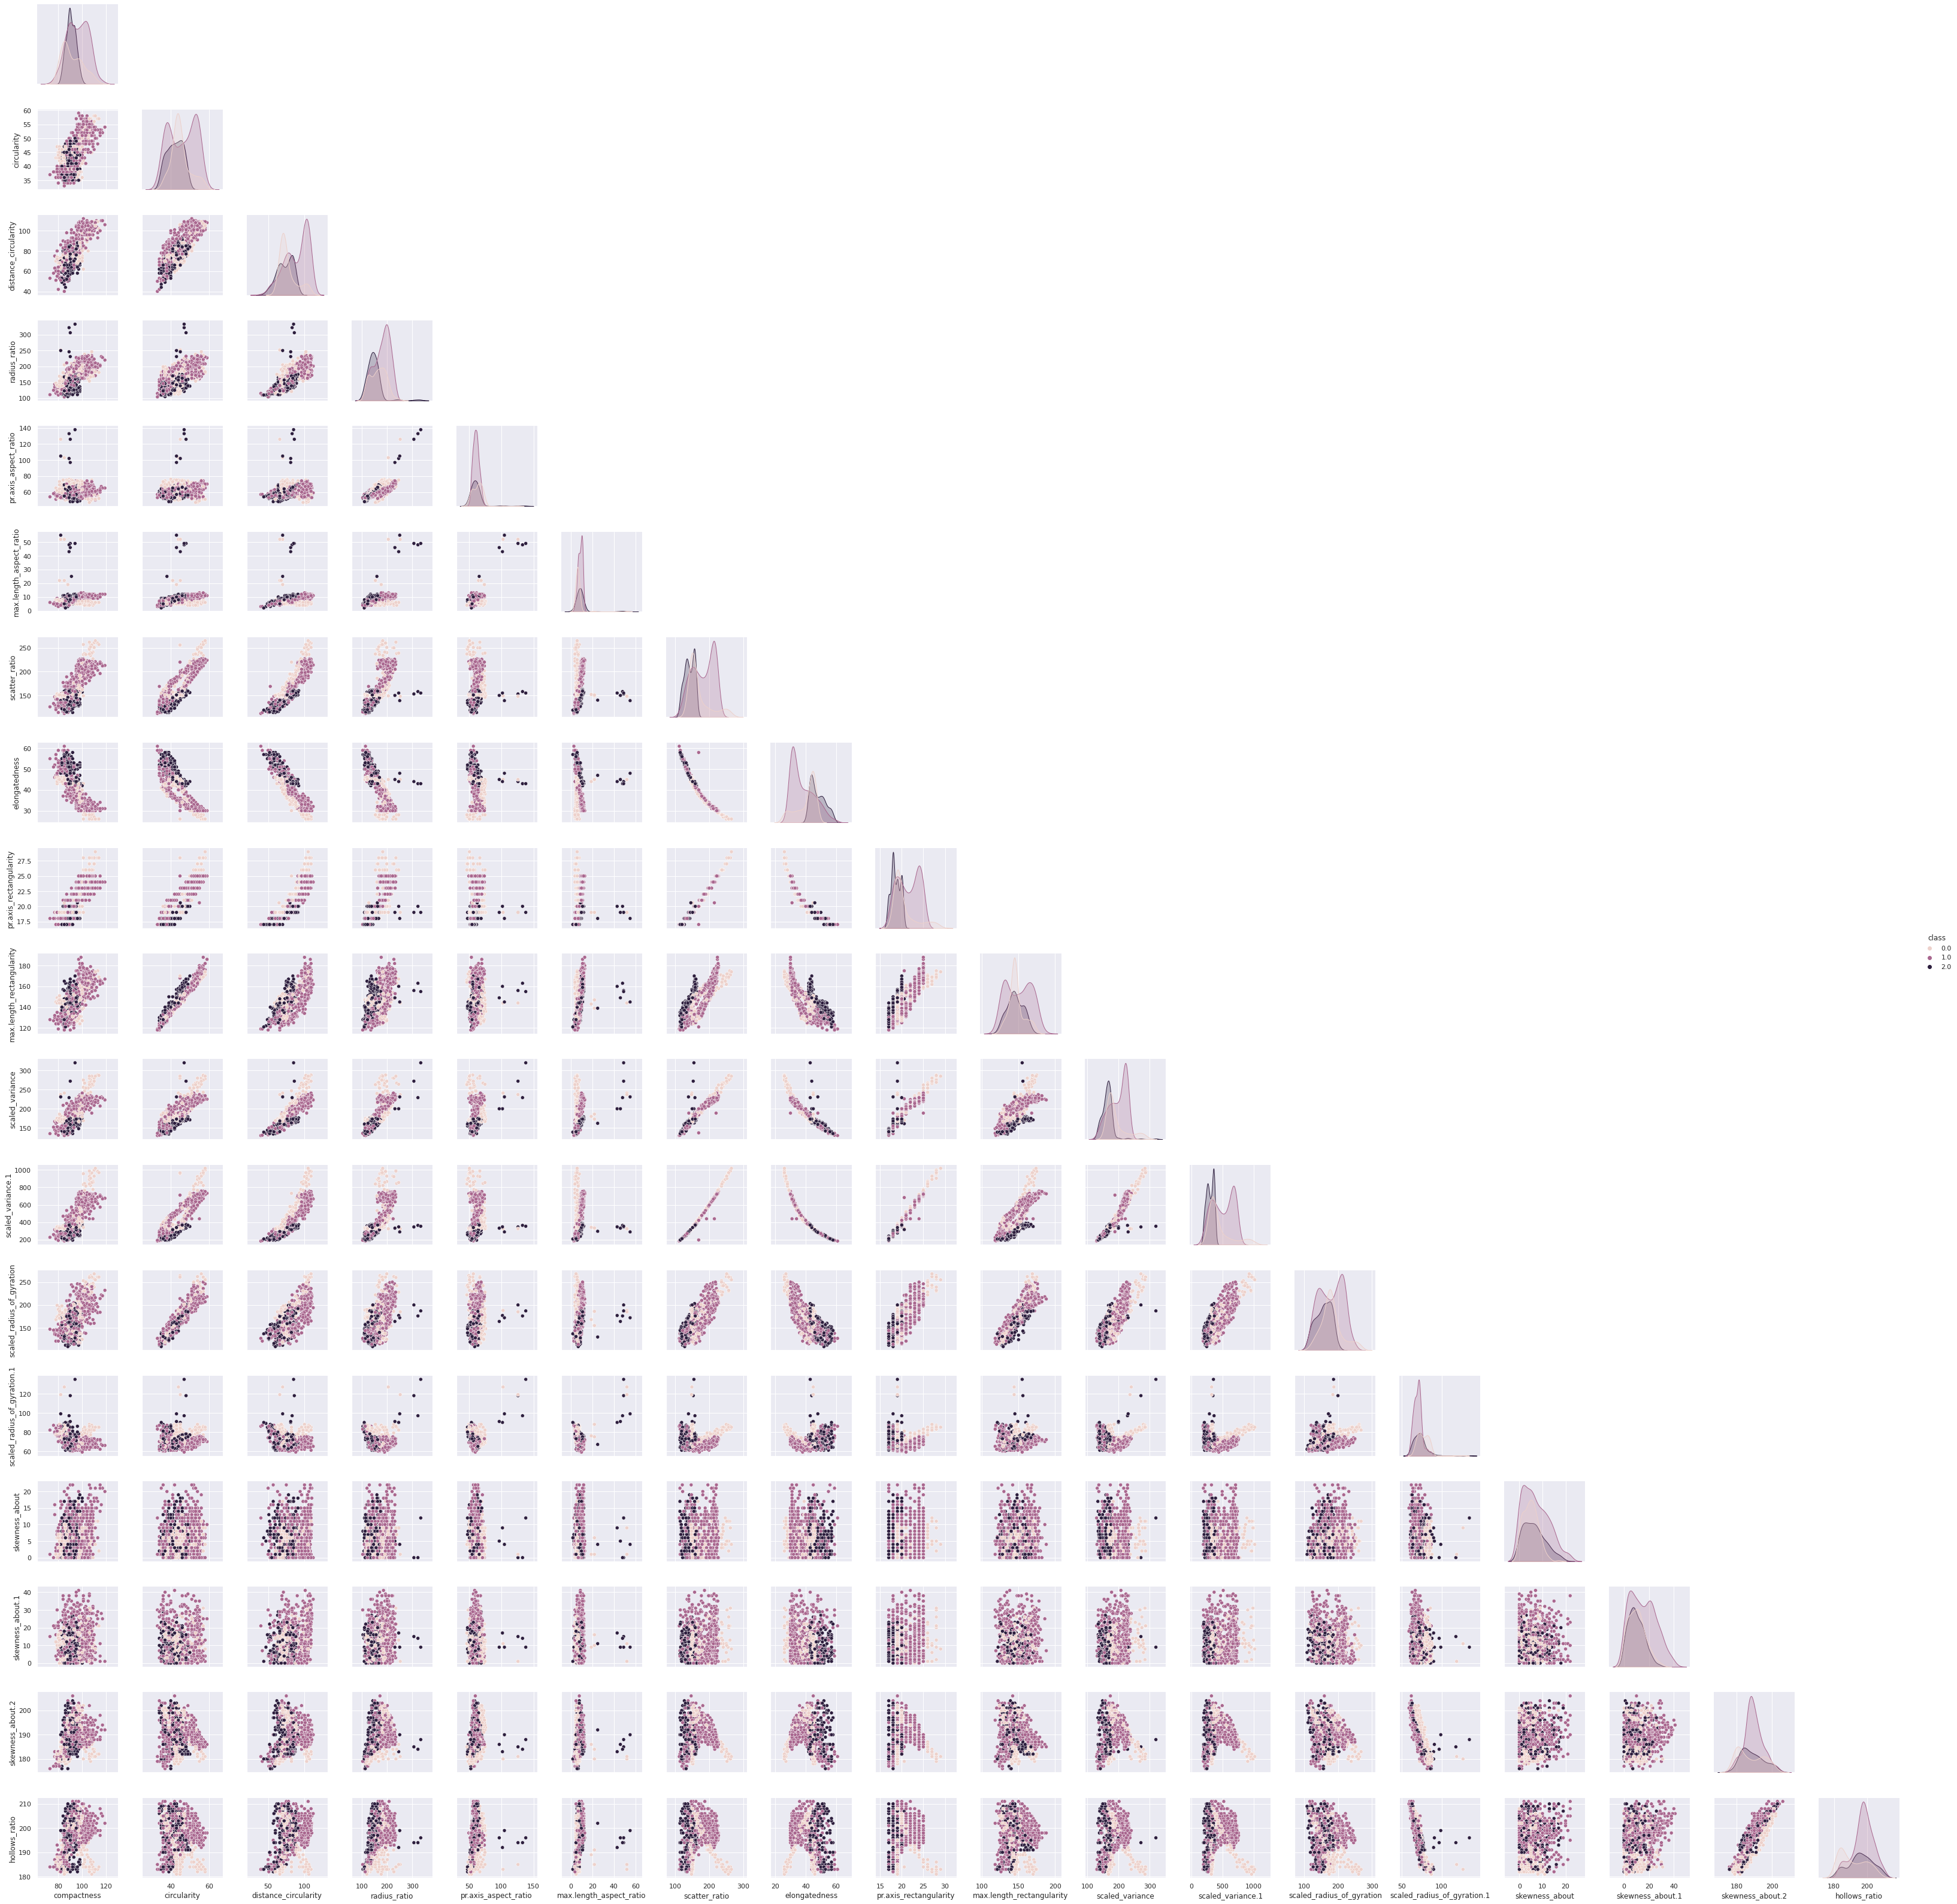

In [139]:
sns.pairplot(df, corner=True, hue='class')

# Feature Selection

By Analysing the Pair plot, there are too many correlated features in the given dataset. We need to do feature selection in the given dataset. We will once again analyse the pairplot output after selecting the neccessary features.

Feature selection can be done in multiple ways.
1. by getting feature importance from Extra Tree Regresser.
2. Getting the correlation numbers and reject the features which satisfies the threshold(th): |th| >= 0.8
3. Reccursive rejection using OLS method. 
4. Principle Component Analysis - Feature Reduction

Before doing the feature selection - we have to handle outliers. This can be done in two ways.
1. Find the outliers, remove them and then scale the data - Normalization
2. Will do Standardization [zscale] - this will Normalize the data and handles the existing outliers.

I will apply Standardization using Standard Scaler.

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

df[cols] = scaler.fit_transform(df[cols])


In [141]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957,2.0
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977,2.0
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447,1.0
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056,2.0
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181,0.0


## Featue Selection using Correlation Matrix

Getting the correlation and plotting in head map.

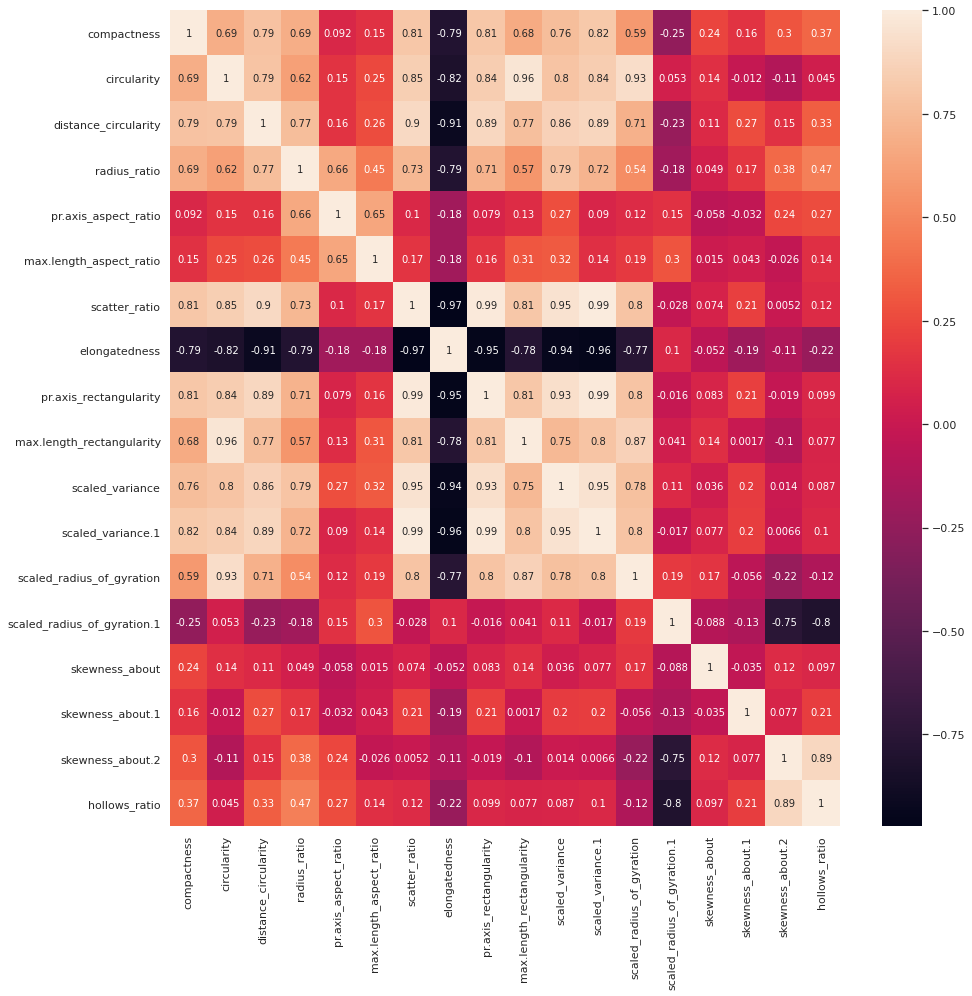

In [142]:
corr = df.iloc[:,0:-1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

## Feature Importance using Exrta Tree Calssifier

We can analyze the feature importance with Extra Tree Classifier.

In [143]:
from sklearn.tree import ExtraTreeRegressor

model = ExtraTreeRegressor()

model.fit(df.iloc[:,0:-1], df['class'])


ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='random')

In [144]:
xtc_feature_importance = pd.concat([pd.DataFrame(cols), pd.DataFrame(model.feature_importances_)], axis=1, ignore_index=True)
xtc_feature_importance.columns = ['features', 'importance']

In [145]:
xtc_feature_importance.sort_values(by='importance', ascending=False)

,features,importance
8,pr.axis_rectangularity,0.177671
2,distance_circularity,0.135508
5,max.length_aspect_ratio,0.130546
13,scaled_radius_of_gyration.1,0.097824
3,radius_ratio,0.093252
9,max.length_rectangularity,0.080591
11,scaled_variance.1,0.075672
17,hollows_ratio,0.044977
10,scaled_variance,0.042392
4,pr.axis_aspect_ratio,0.041361


In [146]:
df_for_pca = df.iloc[:,0:-1].copy(deep=True)

By Examining the correlation matrix, and the Extra Tree Regressor, Below columns can be removed.

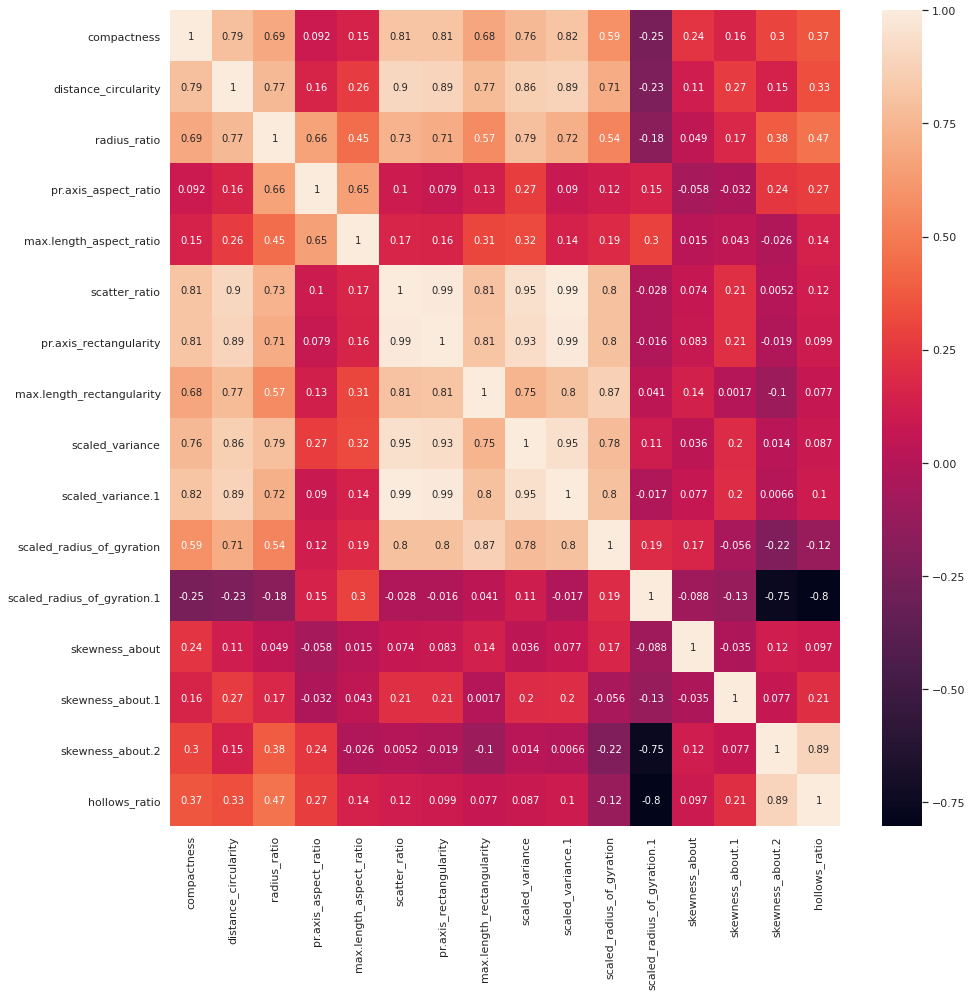

In [147]:
df.drop(columns= ['elongatedness','circularity'], inplace=True)
corr = df.iloc[:,0:-1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

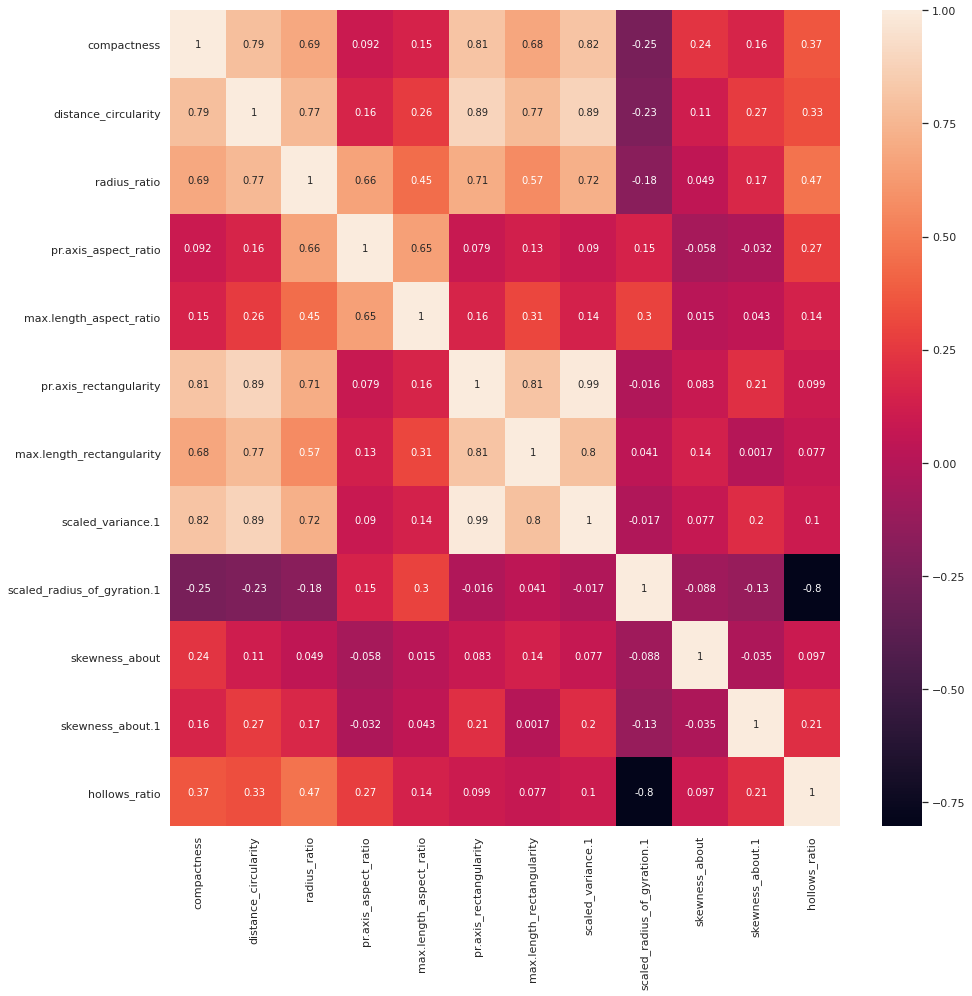

In [148]:
df.drop(columns= ['scatter_ratio','scaled_variance', 'scaled_radius_of_gyration','skewness_about.2'], inplace=True)
corr = df.iloc[:,0:-1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

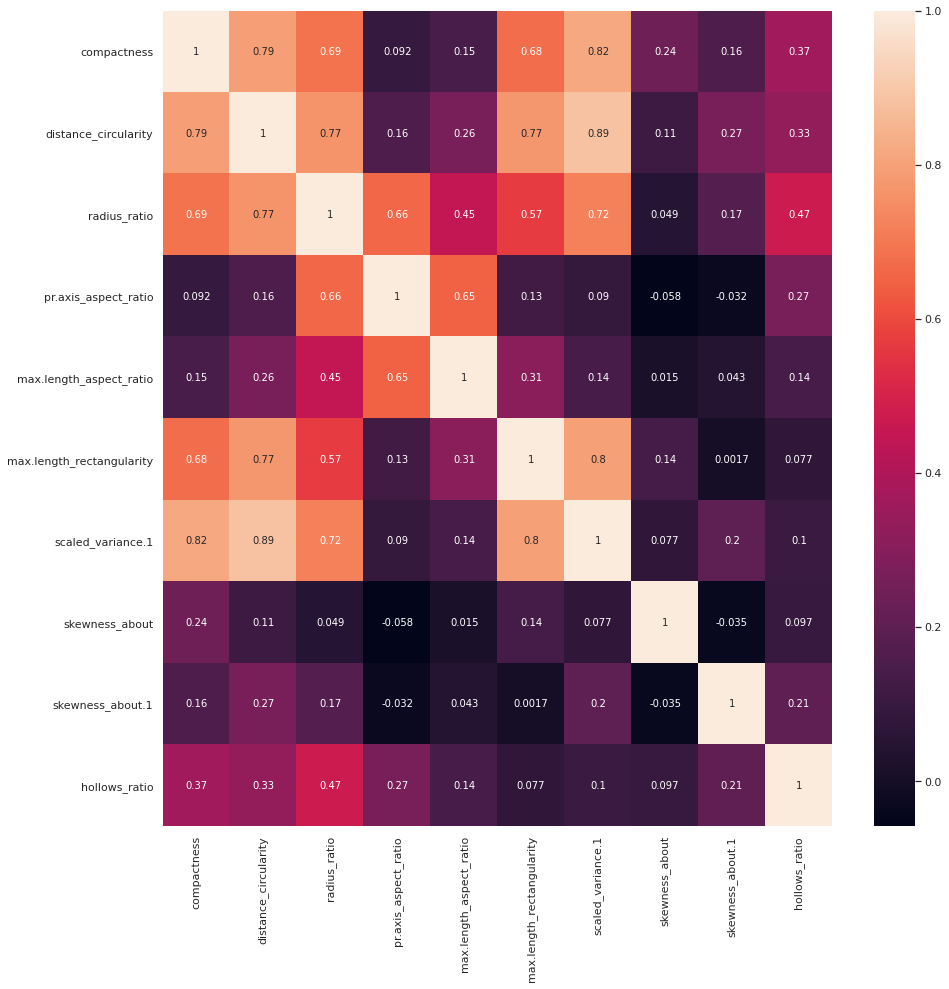

In [149]:
df.drop(columns= ['pr.axis_rectangularity', 'scaled_radius_of_gyration.1'], inplace=True)
corr = df.iloc[:,0:-1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

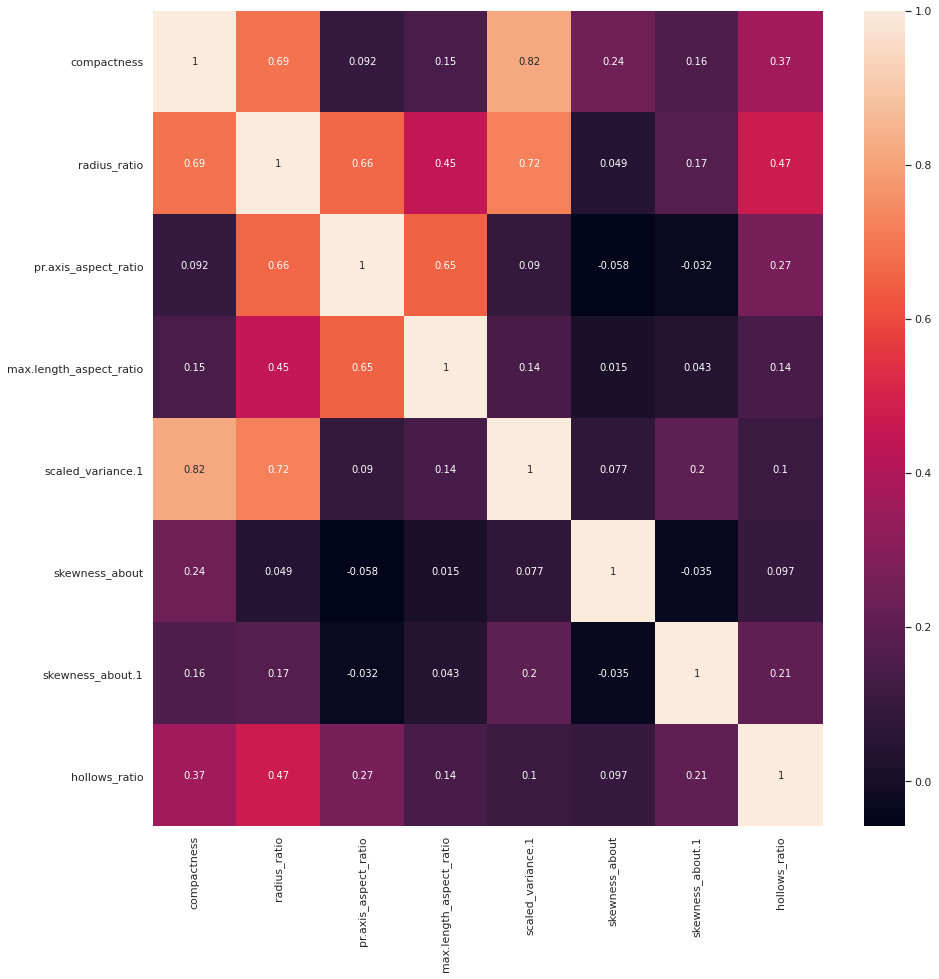

In [150]:
df.drop(columns= ['max.length_rectangularity', 'distance_circularity'], inplace=True)
corr = df.iloc[:,0:-1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

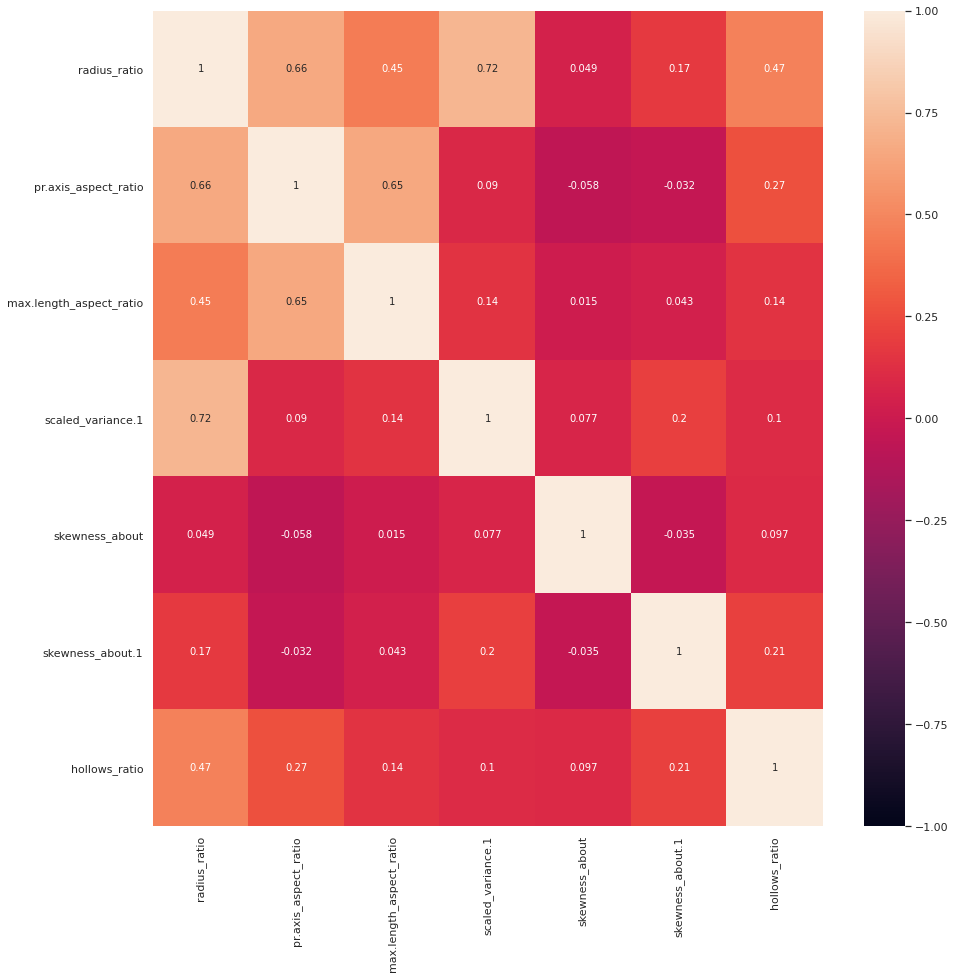

In [151]:
df.drop(columns= ['compactness'], inplace=True)
corr = df.iloc[:,0:-1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

Now the Correlation matrix doesnot have values > 0.8 and less than -0.8

In [152]:
df.head()

,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_variance.1,skewness_about,skewness_about.1,hollows_ratio,class
0,0.272965,1.310206,0.311542,-0.343028,-0.074340,0.380665,0.183957,2.0
1,-0.835442,-0.593962,0.094079,-0.620879,0.537873,0.156589,0.452977,2.0
2,1.201630,0.548539,0.311542,1.108603,1.558230,-0.403603,0.049447,1.0
3,-0.296217,0.167705,0.094079,-0.739958,-0.074340,-0.291565,1.529056,2.0
4,1.081803,5.245485,9.444962,-0.649231,0.537873,-0.179527,-1.699181,0.0


# Splitting the data for Train and Test

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df['class'], test_size=0.30, random_state=100)

In [154]:
X_train.head()

,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_variance.1,skewness_about,skewness_about.1,hollows_ratio
42,-0.955270,-0.974795,0.529004,-0.416743,-0.278411,-0.851757,-0.219572
448,0.752276,0.421594,-0.558308,1.114274,-0.278411,0.156589,-0.488592
235,-1.045141,-0.720906,0.529004,-0.416743,-1.094696,0.156589,-0.488592
254,-0.236303,0.421594,0.746467,-0.484788,-0.890625,-0.403603,0.049447
436,-1.374667,-1.355629,-0.340845,-1.006468,1.966372,-0.067488,-1.430161


# K-Fold Cross Validation

In [155]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
from sklearn.model_selection import KFold

cv_kfold = KFold(5)


# Support Vector Machine Model

In [156]:
space = dict()
space['C'] = [0.1, 1, 10, 100, 1000]
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['kernel'] = ['rbf','linear','sigmoid']

###SVM - Cross Validation score without hyper parameter tuning

In [157]:
from sklearn.model_selection import cross_val_score

scores_pca = cross_val_score(svm.SVC(), df.iloc[:,0:-1], df['class'], cv = cv_kfold_pca)

scores_pca.mean()

0.9137069265576052

In [158]:
model = GridSearchCV(svm.SVC(), param_grid = space, cv = cv_kfold)

In [159]:
model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

###SVM - Cross Validation score after hyper parameter tuning

In [160]:
model.best_score_

0.929069933057969

In [161]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


In [162]:
print('Support Vector Machines:')

print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))


Support Vector Machines:
Training Score:  0.9712837837837838
Testing Score:  0.937007874015748


# Feature Reduction using PCA - 95% variance

In [163]:
df_for_pca.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181


In [164]:
from sklearn.decomposition import PCA

# 95 percent variance maintained. if n is integer then the reduction happens.
model = PCA(n_components=0.95)

reduced_array = model.fit_transform(df_for_pca.iloc[:,0:-1])


In [165]:
model.explained_variance_

array([9.36325091, 2.17072045, 1.89182391, 1.17574393, 0.91597282,
       0.49490068, 0.3584393 ])

95% of variance in data has been maintained by 7 Principal Components

In [166]:
reduced_array.shape

(846, 7)

In [167]:
df_PCA = pd.DataFrame(reduced_array, columns= ['PCA_'+ str(i+1) for i in range(7)])

In [168]:
df_PCA.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,0.316249,0.040224,1.002524,0.179196,0.083385,-0.830549,-0.885533
1,-1.633495,-0.155686,-0.371817,0.209365,0.712590,-0.397115,0.375683
2,3.775239,0.046987,0.089513,1.230855,0.703520,0.655932,-0.039467
3,-1.890998,-2.179371,0.462644,0.433854,-0.382710,-0.575066,0.480032
4,0.737659,6.380186,10.764058,0.061974,3.311118,0.201102,2.648745


In [169]:
y_pca = df['class']

In [170]:
y_pca.head()

0    2.0
1    2.0
2    1.0
3    2.0
4    0.0
Name: class, dtype: float64

In [171]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_PCA, y_pca, test_size=0.30, random_state=100)


In [172]:
cv_kfold_pca = KFold(5)

# SVM model with PCA

###SVM + PCA - Cross Validation score without hyper parameter tuning

In [173]:
from sklearn.model_selection import cross_val_score

scores_pca = cross_val_score(svm.SVC(), df_PCA, y_pca, cv = cv_kfold_pca)

scores_pca.mean()

0.917250261051166

In [174]:
model = GridSearchCV(svm.SVC(), param_grid = space, cv = cv_kfold_pca)

In [175]:
model.fit(X_train_pca, y_train_pca)


y_test_predict_pca = model.predict(X_test_pca)
y_train_predict_pca = model.predict(X_train_pca)

###SVM + PCA - Cross Validation score after hyper parameter tuning



In [176]:
model.best_score_

0.932445520581114

In [177]:
print('Support Vector Machines with PCA:')

print('Training Score: ', model.score(X_train_pca, y_train_pca))
print('Testing Score: ', model.score(X_test_pca, y_test_pca))


Support Vector Machines with PCA:
Training Score:  0.981418918918919
Testing Score:  0.9133858267716536


In [178]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators = 50, random_state=1)


In [179]:
model.fit(X_train_pca, y_train_pca)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [180]:
y_test_predict_pca = model.predict(X_test_pca)
y_train_predict_pca = model.predict(X_train_pca)


In [181]:
print('Gradient Boost with PCA:')

print('Training Score: ', model.score(X_train_pca, y_train_pca))
print('Testing Score: ', model.score(X_test_pca, y_test_pca))

Gradient Boost with PCA:
Training Score:  0.9983108108108109
Testing Score:  0.84251968503937


In [182]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=10, random_state=1)

model.fit(X_train_pca, y_train_pca)

y_test_predict_pca = model.predict(X_test_pca)
y_train_predict_pca = model.predict(X_train_pca)

print('Ada Boost with PCA:')

print('Training Score: ', model.score(X_train_pca, y_train_pca))
print('Testing Score: ', model.score(X_test_pca, y_test_pca))


Ada Boost with PCA:
Training Score:  0.8125
Testing Score:  0.7716535433070866


# Conclusion

We can clearly eliminate the ADA boost and Gradient boost by Comparing SVM. As SVM models's Testing and Training Scores surpasses the scores of ADA and Gradient boosting.

When we applied 5-fold cross validations with hyper parameter tuning without PCA, the Cross validation score is 92.9%, where as

When we applied 5-fold cross validations with hyper parameter tuning with PCA, there was a slight jump in the Cross validation score as 93.24%.

1. With SVM without PCA the training and testing scores are : 97.1 and 93.7
2. With SVM with PCA the training and testing scores are : 98.1 and 91.33

Since we have reduced the 5% of variance in the data - the system tend to overfit but due to some lack of weights on other features[5% variance] to the testing accuracy score started going down. Hence 95% of variance will not be the optimal variance to get the best fit. 

The best fit may be occuring at variance more than 95%. Too much reduction in PCA can reduce the accuracy score, that's not the point we wanted. 

The PCA variance should be selected in such a way that the accuracy scores should be at maximum.